<a href="https://colab.research.google.com/github/iqkazim/lorawan/blob/Colab-Code/Normalize_x_axis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import io
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import plotly.graph_objects as go
import plotly.express as px
from math import sqrt
import sklearn
import sklearn_pandas
import array as arr
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Mean_SF.csv to Mean_SF.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['Mean_SF.csv']))
df

,nDevices,SF7,SF8,SF9,SF10,SF11,SF12
0,10,9.733333,9.533333,9.333333,8.666667,7.833333,6.466667
1,20,19.466667,18.333333,17.400000,15.200000,12.100000,7.500000
2,30,28.200000,27.200000,23.833333,20.166667,13.200000,7.366667
3,40,37.400000,33.633333,28.933333,22.600000,13.633333,5.366667
4,50,44.766667,40.366667,34.100000,24.733333,13.600000,4.366667
...,...,...,...,...,...,...,...
95,960,98.566667,15.866667,0.633333,0.000000,0.000000,0.000000
96,970,100.000000,15.000000,0.833333,0.000000,0.000000,0.000000
97,980,98.066667,13.966667,0.733333,0.000000,0.000000,0.000000
98,990,93.400000,14.166667,0.666667,0.000000,0.000000,0.000000


In [ ]:
df1=pd.concat([df.iloc[:,:1], df.iloc[:,1:] * (22/5)], axis=1).round(2)
df1

,nDevices,SF7,SF8,SF9,SF10,SF11,SF12
0,10,42.83,41.95,41.07,38.13,34.47,28.45
1,20,85.65,80.67,76.56,66.88,53.24,33.00
2,30,124.08,119.68,104.87,88.73,58.08,32.41
3,40,164.56,147.99,127.31,99.44,59.99,23.61
4,50,196.97,177.61,150.04,108.83,59.84,19.21
...,...,...,...,...,...,...,...
95,960,433.69,69.81,2.79,0.00,0.00,0.00
96,970,440.00,66.00,3.67,0.00,0.00,0.00
97,980,431.49,61.45,3.23,0.00,0.00,0.00
98,990,410.96,62.33,2.93,0.00,0.00,0.00


In [ ]:
df1['Mean'] = df1.iloc[:,1:31].mean(axis=1).round(2)
df1

,nDevices,SF7,SF8,SF9,SF10,SF11,SF12,Mean
0,10,42.83,41.95,41.07,38.13,34.47,28.45,37.82
1,20,85.65,80.67,76.56,66.88,53.24,33.00,66.00
2,30,124.08,119.68,104.87,88.73,58.08,32.41,87.98
3,40,164.56,147.99,127.31,99.44,59.99,23.61,103.82
4,50,196.97,177.61,150.04,108.83,59.84,19.21,118.75
...,...,...,...,...,...,...,...,...
95,960,433.69,69.81,2.79,0.00,0.00,0.00,84.38
96,970,440.00,66.00,3.67,0.00,0.00,0.00,84.94
97,980,431.49,61.45,3.23,0.00,0.00,0.00,82.70
98,990,410.96,62.33,2.93,0.00,0.00,0.00,79.37


In [ ]:
df2=df1
df2['LoadSF7']=(df2['nDevices']*22/5)/5470
df2['LoadSF8']=(df2['nDevices']*22/5)/3125
df2['LoadSF9']=(df2['nDevices']*22/5)/1760
df2['LoadSF10']=(df2['nDevices']*22/5)/980
df2['LoadSF11']=(df2['nDevices']*22/5)/440
df2['LoadSF12']=(df2['nDevices']*22/5)/250
df2['SF7.']=df2['SF7']#/5470
df2['SF8.']=df2['SF8']#/3125
df2['SF9.']=df2['SF9']#/1760
df2['SF10.']=df2['SF10']#/980
df2['SF11.']=df2['SF11']#/440
df2['SF12.']=df2['SF12']#/250
df2

,nDevices,SF7,SF8,SF9,SF10,SF11,SF12,Mean,LoadSF7,LoadSF8,LoadSF9,LoadSF10,LoadSF11,LoadSF12,SF7.,SF8.,SF9.,SF10.,SF11.,SF12.
0,10,42.83,41.95,41.07,38.13,34.47,28.45,37.82,0.008044,0.01408,0.025,0.044898,0.1,0.176,42.83,41.95,41.07,38.13,34.47,28.45
1,20,85.65,80.67,76.56,66.88,53.24,33.00,66.00,0.016088,0.02816,0.050,0.089796,0.2,0.352,85.65,80.67,76.56,66.88,53.24,33.00
2,30,124.08,119.68,104.87,88.73,58.08,32.41,87.98,0.024132,0.04224,0.075,0.134694,0.3,0.528,124.08,119.68,104.87,88.73,58.08,32.41
3,40,164.56,147.99,127.31,99.44,59.99,23.61,103.82,0.032176,0.05632,0.100,0.179592,0.4,0.704,164.56,147.99,127.31,99.44,59.99,23.61
4,50,196.97,177.61,150.04,108.83,59.84,19.21,118.75,0.040219,0.07040,0.125,0.224490,0.5,0.880,196.97,177.61,150.04,108.83,59.84,19.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,960,433.69,69.81,2.79,0.00,0.00,0.00,84.38,0.772212,1.35168,2.400,4.310204,9.6,16.896,433.69,69.81,2.79,0.00,0.00,0.00
96,970,440.00,66.00,3.67,0.00,0.00,0.00,84.94,0.780256,1.36576,2.425,4.355102,9.7,17.072,440.00,66.00,3.67,0.00,0.00,0.00
97,980,431.49,61.45,3.23,0.00,0.00,0.00,82.70,0.788300,1.37984,2.450,4.400000,9.8,17.248,431.49,61.45,3.23,0.00,0.00,0.00
98,990,410.96,62.33,2.93,0.00,0.00,0.00,79.37,0.796344,1.39392,2.475,4.444898,9.9,17.424,410.96,62.33,2.93,0.00,0.00,0.00


In [ ]:
df2.head(50)


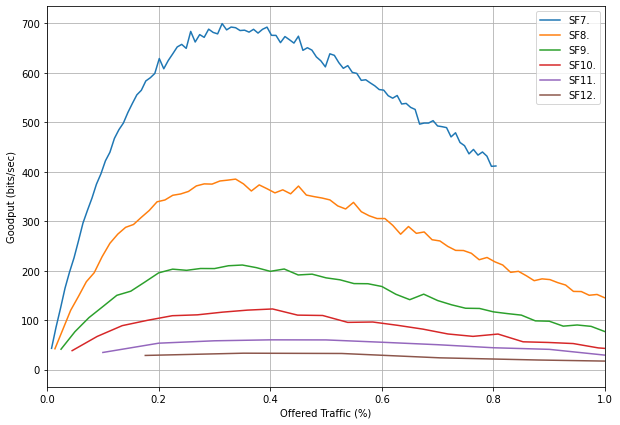

In [ ]:
ax = plt.gca()
df2.plot(kind='line', x= 'LoadSF7', y= 'SF7.',ax=ax,grid=True,figsize=(10,7))
df2.plot(kind='line', x= 'LoadSF8', y= 'SF8.',ax=ax,grid=True)
df2.plot(kind='line', x= 'LoadSF9', y= 'SF9.',ax=ax,grid=True)
df2.plot(kind='line', x= 'LoadSF10', y= 'SF10.',ax=ax,grid=True)
df2.plot(kind='line', x= 'LoadSF11', y= 'SF11.',ax=ax,grid=True)
df2.plot(kind='line', x= 'LoadSF12', y= 'SF12.',ax=ax,grid=True)
plt.ylabel('Goodput (bits/sec)')
plt.xlabel('Offered Traffic (%)')      
ax.set_xlim ([0, 1])   
#ax.set_yscale ('log')
#ax.set_xscale ('log')
plt.show()